In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("./creditcard.csv")

# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

# If there are missing values, handle them (Imputation or removal)
df.fillna(df.mean(), inplace=True)  # For numerical features
# or df.dropna(inplace=True) # to drop rows with missing values (if needed)

Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [3]:
# Checking for categorical columns (if any exist)
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_columns}")

# Encoding categorical features if found
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

Categorical columns: Index([], dtype='object')


In [4]:
# Detecting outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(f"Outliers detected in each feature:\n{outliers}")

# Removing outliers (optional)
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

Outliers detected in each feature:
Time          0
V1         7062
V2        13526
V3         3363
V4        11148
V5        12295
V6        22965
V7         8948
V8        24134
V9         8283
V10        9496
V11         780
V12       15348
V13        3368
V14       14149
V15        2894
V16        8184
V17        7420
V18        7533
V19       10205
V20       27770
V21       14497
V22        1317
V23       18541
V24        4774
V25        5367
V26        5596
V27       39163
V28       30342
Amount    31904
Class       492
dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Apply StandardScaler
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Alternatively, you could use MinMaxScaler
# min_max_scaler = MinMaxScaler()
# df[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

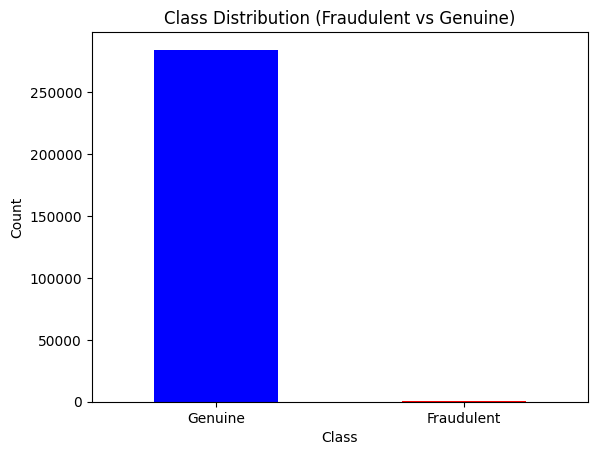

In [6]:
import matplotlib.pyplot as plt

# Distribution of the target variable
target = df['Class']  # 'Class' is the target variable (fraudulent = 1, genuine = 0)
target.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Class Distribution (Fraudulent vs Genuine)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Genuine', 'Fraudulent'], rotation=0)
plt.show()

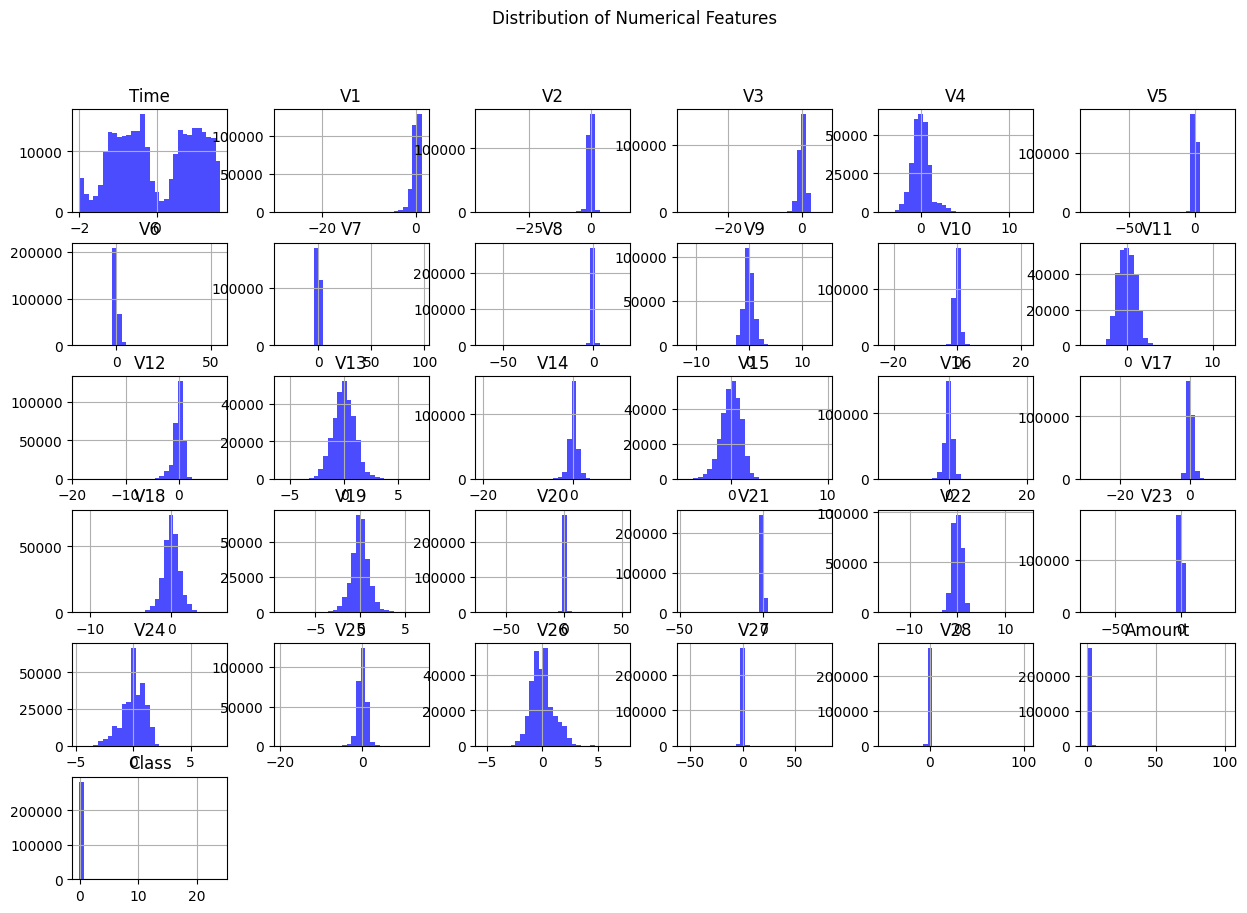

Skewness of numerical features:
Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64


In [7]:
# Plot the distribution of numerical features
df[numerical_columns].hist(figsize=(15, 10), bins=30, color='blue', alpha=0.7)
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Check for skewness
skewness = df[numerical_columns].skew()
print(f"Skewness of numerical features:\n{skewness}")

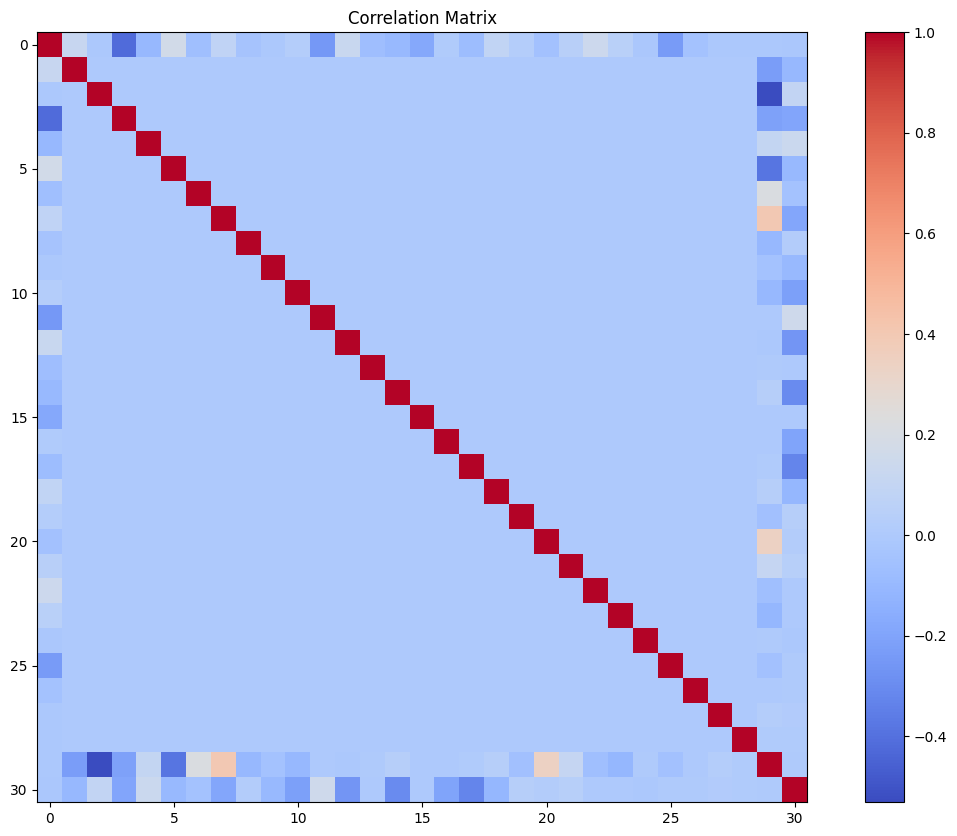

Features correlated with target 'Class':
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [8]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
plt.title('Correlation Matrix')
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.show()

# Check correlation with the target variable
target_correlation = correlation_matrix['Class'].sort_values(ascending=False)
print(f"Features correlated with target 'Class':\n{target_correlation}")

In [10]:
%pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 5.8 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Split the data into features and target
X = df.drop('Class', axis=1)
y = df['Class'].astype('str')

# Initialize models
log_reg = LogisticRegression()
rf_model = RandomForestClassifier()

# Fit models (example for Logistic Regression)
log_reg.fit(X, y)
print("Logistic Regression model trained.")

Logistic Regression model trained.


In [15]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")

Training set size: 227845, Testing set size: 56962


In [16]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Evaluate Logistic Regression model (example)
y_pred = log_reg.predict(X_test)

# Classification report (precision, recall, F1-score)
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# AUC-ROC score
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
print(f"AUC-ROC Score: {roc_auc}")

Classification Report:
                      precision    recall  f1-score   support

-0.04159897836869265       1.00      1.00      1.00     56864
   24.03905190019278       0.84      0.62      0.71        98

            accuracy                           1.00     56962
           macro avg       0.92      0.81      0.86     56962
        weighted avg       1.00      1.00      1.00     56962

AUC-ROC Score: 0.9672627421818474
